In [52]:
import pandas
import urllib3
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import numpy
import scipy

In [4]:
nf = 'News_Final.csv'

In [11]:
NewsFile = pandas.read_csv(nf)
NewsFile = NewsFile[NewsFile['Facebook'] > 0 ]
NewsFile = NewsFile[NewsFile['GooglePlus'] > 0 ]
NewsFile = NewsFile[NewsFile['LinkedIn'] > 0 ]

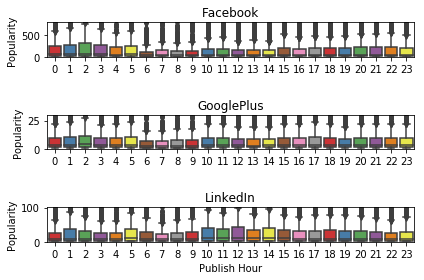

In [14]:
def TimeMatter():
    NewsFile['publishtime'] = NewsFile['PublishDate'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
    NewsFile['publishhour'] = NewsFile['publishtime'].apply(lambda x:x.hour) 
    fig, axes = plt.subplots(3,1)
    sns.boxplot(x = 'publishhour', y = 'Facebook', data = NewsFile, palette = 'Set1',ax = axes[0])
    sns.boxplot(x = 'publishhour', y = 'GooglePlus', data = NewsFile, palette = 'Set1',ax = axes[1])
    sns.boxplot(x = 'publishhour', y = 'LinkedIn', data = NewsFile, palette = 'Set1',ax = axes[2])
    axes[0].set_ylim((0,780))
    axes[0].set_xlabel(' ')
    axes[0].set_title('Facebook')
    axes[0].set_ylabel('Popularity')
    axes[1].set_ylim((0,30))
    axes[1].set_xlabel(' ')
    axes[1].set_title('GooglePlus')
    axes[1].set_ylabel('Popularity')
    axes[2].set_ylim((0,101)) 
    axes[2].set_xlabel('Publish Hour')
    axes[2].set_title('LinkedIn')
    axes[2].set_ylabel('Popularity')  
    fig.tight_layout()
    plt.show()
    #plt.savefig('Popularity_Hour.png',dpi = 500) 
TimeMatter()

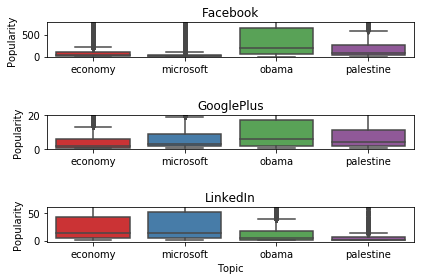

In [15]:
def topicMatter():
    fig, axes = plt.subplots(3,1)
    sns.boxplot(x = 'Topic', y = 'Facebook', data = NewsFile, palette = 'Set1',ax = axes[0])
    sns.boxplot(x = 'Topic', y = 'GooglePlus', data = NewsFile, palette = 'Set1',ax = axes[1])
    sns.boxplot(x = 'Topic', y = 'LinkedIn', data = NewsFile, palette = 'Set1',ax = axes[2])
    axes[0].set_ylim((-10,780))
    axes[0].set_xlabel(' ')
    axes[0].set_title('Facebook')
    axes[0].set_ylabel('Popularity')
    axes[1].set_ylim((0,20))
    axes[1].set_xlabel(' ')
    axes[1].set_title('GooglePlus')
    axes[1].set_ylabel('Popularity')
    axes[2].set_ylim((-2,60)) 
    axes[2].set_xlabel('Topic')
    axes[2].set_title('LinkedIn')
    axes[2].set_ylabel('Popularity')  
    fig.tight_layout()
    plt.show()
topicMatter()

In [20]:
FE = pandas.read_csv('Facebook_Economy.csv')
FM = pandas.read_csv('Facebook_Microsoft.csv')
FO = pandas.read_csv('Facebook_Obama.csv')
FP = pandas.read_csv('Facebook_Palestine.csv')
GE = pandas.read_csv('GooglePlus_Economy.csv')
GM = pandas.read_csv('GooglePlus_Microsoft.csv')
GO = pandas.read_csv('GooglePlus_Obama.csv')
GP = pandas.read_csv('GooglePlus_Palestine.csv')
LE = pandas.read_csv('LinkedIn_Economy.csv')
LM = pandas.read_csv('LinkedIn_Microsoft.csv')
LO = pandas.read_csv('LinkedIn_Obama.csv')
LP = pandas.read_csv('LinkedIn_Palestine.csv')

MSE(Facebook): 629733.7104
MSE(GooglePlus): 622.5297
MSE(LinkedIn): 24255.9916


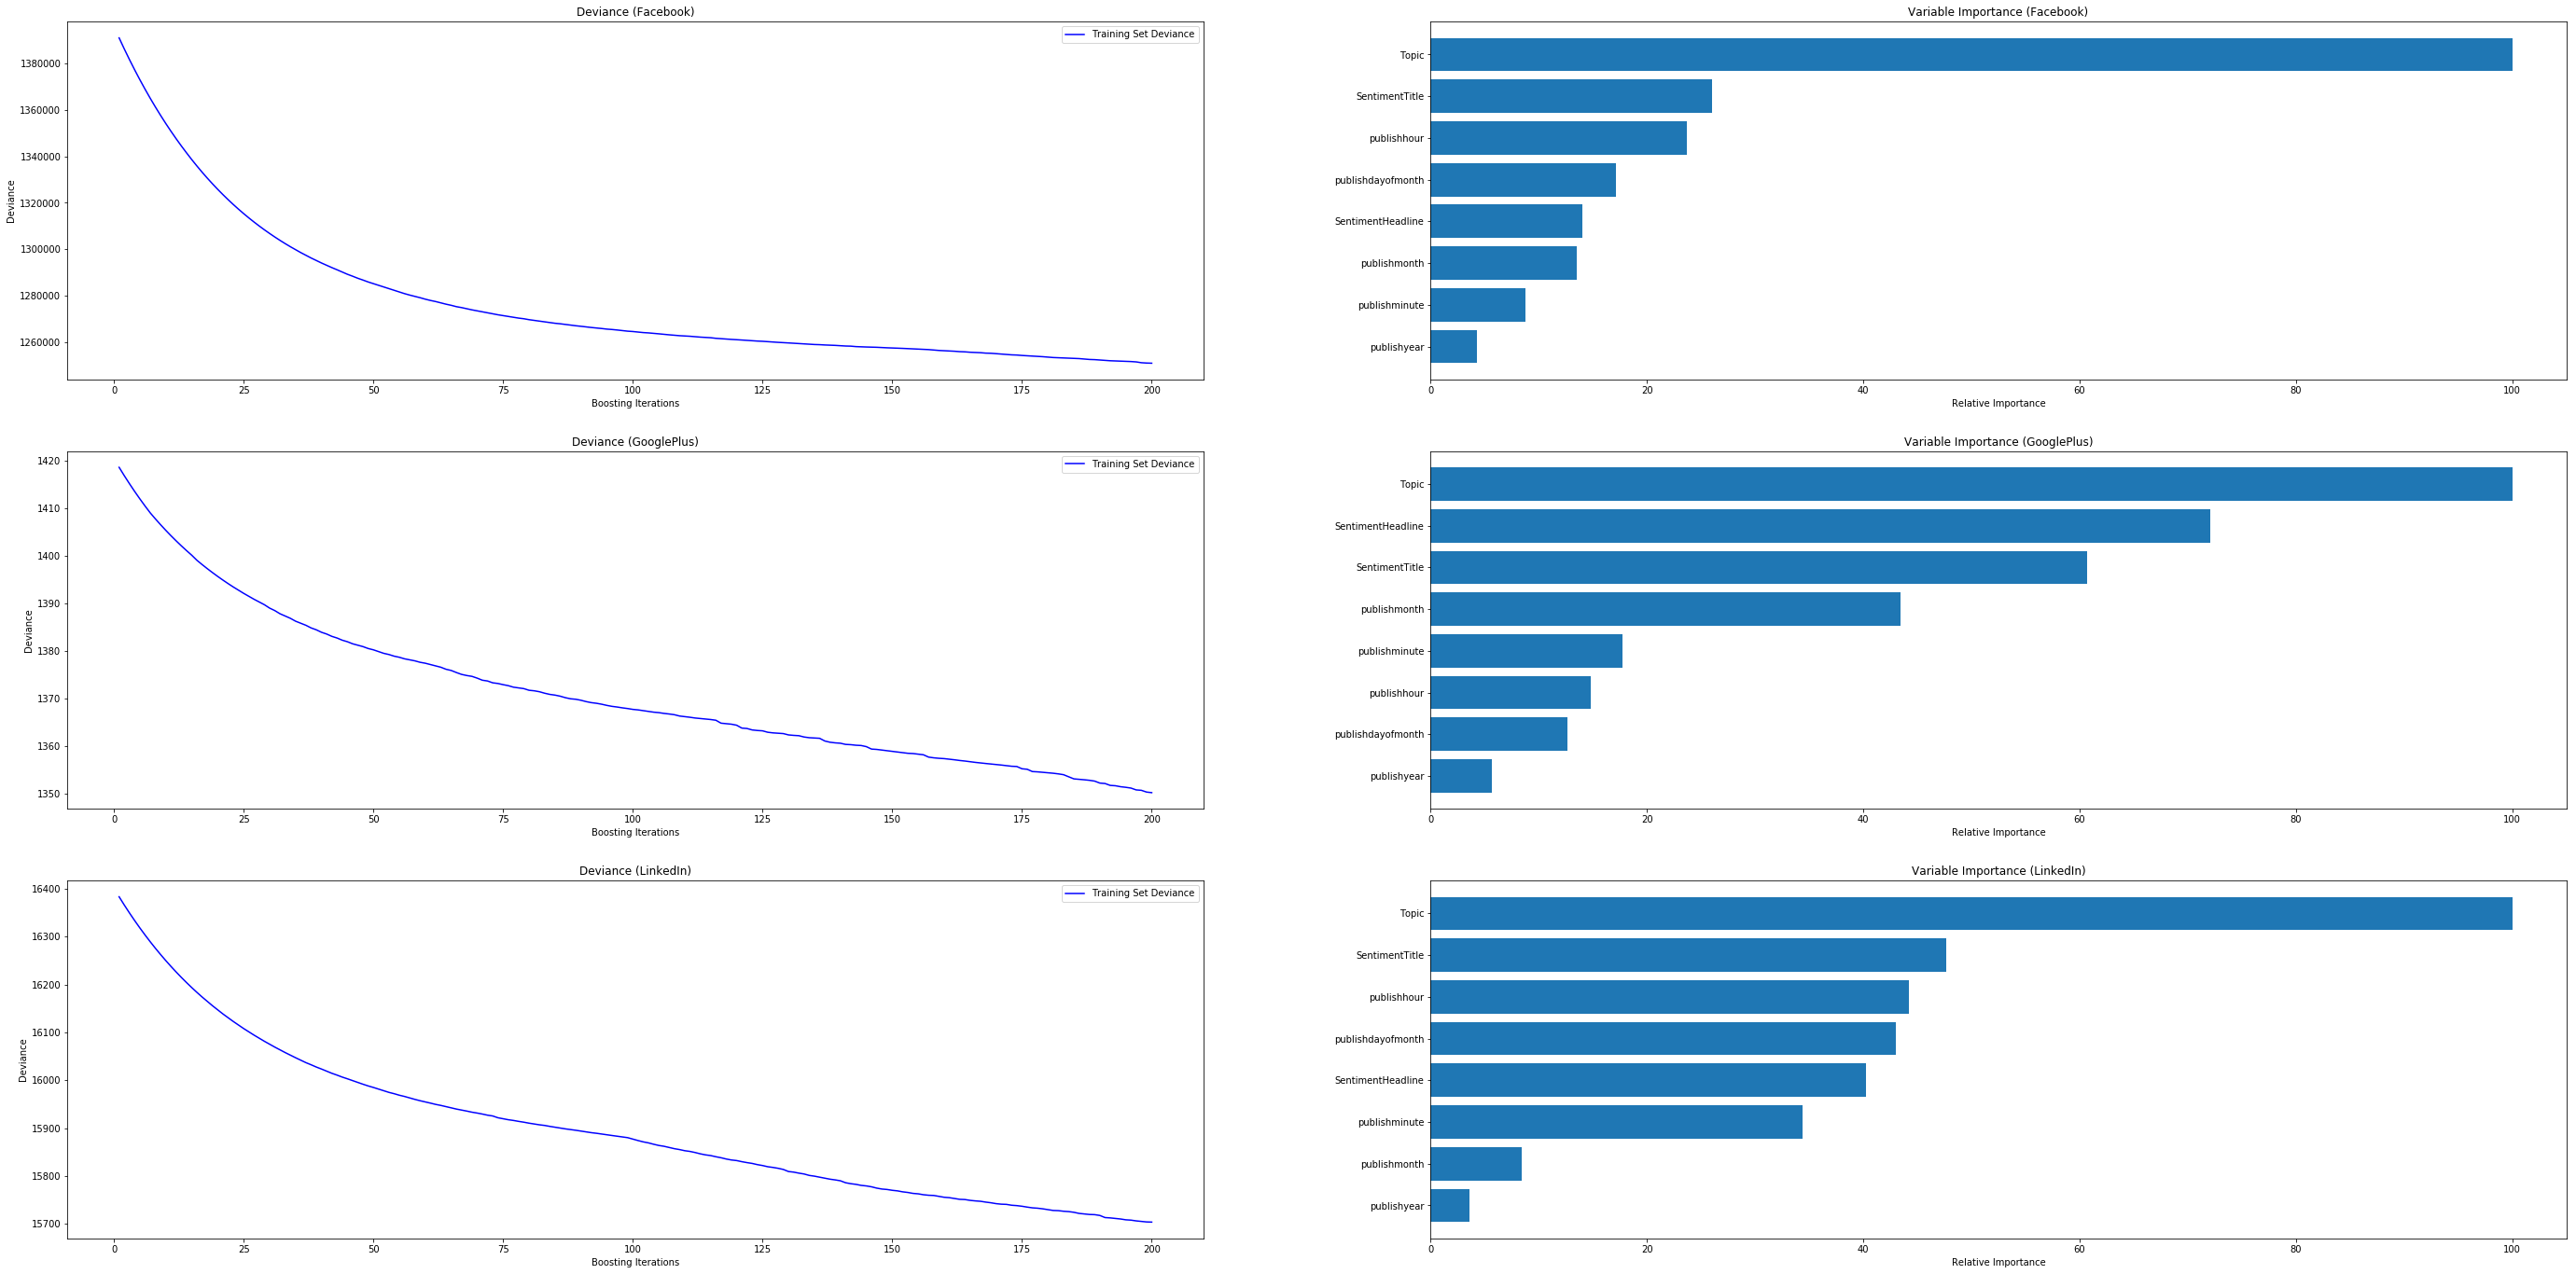

In [53]:
def GradientBoosting():
    #devide the data into training and testing set
    NewsFile['publishtime'] = NewsFile['PublishDate'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
    NewsFile['publishhour'] = NewsFile['publishtime'].apply(lambda x:x.hour)
    NewsFile['publishminute'] = NewsFile['publishtime'].apply(lambda x:x.minute)
    NewsFile['publishmonth'] = NewsFile['publishtime'].apply(lambda x:x.month)
    NewsFile['publishyear'] = NewsFile['publishtime'].apply(lambda x:x.year)
    NewsFile['publishdayofmonth'] = NewsFile['publishtime'].apply(lambda x:x.day)
    '''[economy, microsoft, obama, palestine] = [0,1,2,3]'''
    NewsFile['Topic'] = NewsFile['Topic'].astype('category')
    NewsFile['Topic'] = NewsFile['Topic'].cat.codes
    offset = int(NewsFile.shape[0] * 0.6)
    column = ['Topic','publishhour','publishminute','publishmonth','publishyear','publishdayofmonth','SentimentTitle','SentimentHeadline']
    X_train, y_train = NewsFile[column][:offset].values,NewsFile[['Facebook']][:offset].values
    X_test, y_test = NewsFile[column][offset:].values,NewsFile[['Facebook']][offset:].values
    params = {'n_estimators': 200, 'min_samples_leaf':5, 'min_samples_split': 5,'learning_rate': 0.02}
    clf = ensemble.GradientBoostingRegressor(**params)
    clf.fit(X_train, numpy.ravel(y_train))
    mse = mean_squared_error(y_test, clf.predict(X_test))
    print("MSE(Facebook): %.4f" % mse)
        
    test_score = numpy.zeros((params['n_estimators'],), dtype=numpy.float64)
    for i, y_pred in enumerate(clf.staged_predict(X_test)):
        test_score[i] = clf.loss_(y_test, y_pred)
    plt.figure(figsize=(48, 24))
    plt.subplot(321)
    plt.title('Deviance (Facebook)')
    plt.plot(numpy.arange(params['n_estimators']) + 1, clf.train_score_, 'b-', label='Training Set Deviance')
    #plt.plot(numpy.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
    plt.legend(loc='upper right')
    plt.xlabel('Boosting Iterations')
    plt.ylabel('Deviance')
        
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = numpy.argsort(feature_importance)
    pos = numpy.arange(sorted_idx.shape[0]) + .5
    plt.subplot(322)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, scipy.array(column)[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance (Facebook)')
        
    
    X_train, y_train = NewsFile[column][:offset].values,NewsFile[['GooglePlus']][:offset].values
    X_test, y_test = NewsFile[column][offset:].values,NewsFile[['GooglePlus']][offset:].values
    params = {'n_estimators': 200, 'min_samples_leaf':5, 'min_samples_split': 5,'learning_rate': 0.02}
    clf = ensemble.GradientBoostingRegressor(**params)
    clf.fit(X_train, numpy.ravel(y_train))
    mse = mean_squared_error(y_test, clf.predict(X_test))
    print("MSE(GooglePlus): %.4f" % mse)    
            
    test_score = numpy.zeros((params['n_estimators'],), dtype=numpy.float64)
    for i, y_pred in enumerate(clf.staged_predict(X_test)):
        test_score[i] = clf.loss_(y_test, y_pred)
    plt.subplot(323)
    plt.title('Deviance (GooglePlus)')
    plt.plot(numpy.arange(params['n_estimators']) + 1, clf.train_score_, 'b-', label='Training Set Deviance')
    #plt.plot(numpy.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
    plt.legend(loc='upper right')
    plt.xlabel('Boosting Iterations')
    plt.ylabel('Deviance')
        
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = numpy.argsort(feature_importance)
    pos = numpy.arange(sorted_idx.shape[0]) + .5
    plt.subplot(324)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, scipy.array(column)[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance (GooglePlus)')
        
    X_train, y_train = NewsFile[column][:offset].values,NewsFile[['LinkedIn']][:offset].values
    X_test, y_test = NewsFile[column][offset:].values,NewsFile[['LinkedIn']][offset:].values
    params = {'n_estimators': 200, 'min_samples_leaf':5, 'min_samples_split': 5,'learning_rate': 0.02}
    clf = ensemble.GradientBoostingRegressor(**params)
    clf.fit(X_train, numpy.ravel(y_train))
    mse = mean_squared_error(y_test, clf.predict(X_test))
    print("MSE(LinkedIn): %.4f" % mse)    
            
    test_score = numpy.zeros((params['n_estimators'],), dtype=numpy.float64)
    for i, y_pred in enumerate(clf.staged_predict(X_test)):
        test_score[i] = clf.loss_(y_test, y_pred)
    plt.subplot(325)
    plt.title('Deviance (LinkedIn)')
    plt.plot(numpy.arange(params['n_estimators']) + 1, clf.train_score_, 'b-', label='Training Set Deviance')
    #plt.plot(numpy.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
    plt.legend(loc='upper right')
    plt.xlabel('Boosting Iterations')
    plt.ylabel('Deviance')
        
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = numpy.argsort(feature_importance)
    pos = numpy.arange(sorted_idx.shape[0]) + .5
    plt.subplot(326)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, scipy.array(column)[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance (LinkedIn)')
    #fig.tight_layout()
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}
    matplotlib.rc('font', **font)
    plt.show()
GradientBoosting()

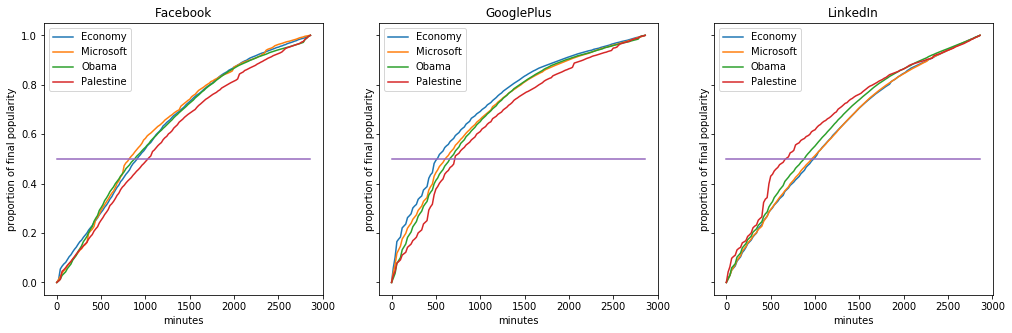

In [50]:
fe = (FE.mean()[1:]-FE.mean()[1])/(FE.mean()[-1]-FE.mean()[1])
fm = (FM.mean()[1:]-FM.mean()[1])/(FM.mean()[-1]-FM.mean()[1])
fo = (FO.mean()[1:]-FO.mean()[1])/(FO.mean()[-1]-FO.mean()[1])
fp = (FP.mean()[1:]-FP.mean()[1])/(FP.mean()[-1]-FP.mean()[1])

ge = (GE.mean()[1:]-GE.mean()[1])/(GE.mean()[-1]-GE.mean()[1])
gm = (GM.mean()[1:]-GM.mean()[1])/(GM.mean()[-1]-GM.mean()[1])
go = (GO.mean()[1:]-GO.mean()[1])/(GO.mean()[-1]-GO.mean()[1])
gp = (GP.mean()[1:]-GP.mean()[1])/(GP.mean()[-1]-GP.mean()[1])

le = (LE.mean()[1:]-LE.mean()[1])/(LE.mean()[-1]-LE.mean()[1])
lm = (LM.mean()[1:]-LM.mean()[1])/(LM.mean()[-1]-LM.mean()[1])
lo = (LO.mean()[1:]-LO.mean()[1])/(LO.mean()[-1]-LO.mean()[1])
lp = (LP.mean()[1:]-LP.mean()[1])/(LP.mean()[-1]-LP.mean()[1])
X = range(0,2880,20)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5), sharey=True)
axes[0].plot(X,fe,label='Economy')
axes[0].plot(X,fm,label = 'Microsoft')
axes[0].plot(X,fo,label ='Obama')
axes[0].plot(X,fp,label ='Palestine')
axes[0].plot(X,[0.5]*len(X))
axes[0].set_xlabel('minutes')
axes[0].set_ylabel('proportion of final popularity')
axes[0].set_title('Facebook')
axes[0].legend()

axes[1].plot(X,ge,label='Economy')
axes[1].plot(X,gm,label = 'Microsoft')
axes[1].plot(X,go,label ='Obama')
axes[1].plot(X,gp,label ='Palestine')
axes[1].plot(X,[0.5]*len(X))
axes[1].set_xlabel('minutes')
axes[1].set_ylabel('proportion of final popularity')
axes[1].set_title('GooglePlus')
axes[1].legend()

axes[2].plot(X,le,label='Economy')
axes[2].plot(X,lm,label = 'Microsoft')
axes[2].plot(X,lo,label ='Obama')
axes[2].plot(X,lp,label ='Palestine')
axes[2].plot(X,[0.5]*len(X))
axes[2].set_xlabel('minutes')
axes[2].set_ylabel('proportion of final popularity')
axes[2].set_title('LinkedIn')
axes[2].legend()
plt.show()